In [15]:
#import all the necessary libraries
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
#%pip install lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test


In [16]:
#import this file files/titanic3.xls into a dataframe
data = pd.read_excel('../files/titanic3.xls')
data.head()  

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


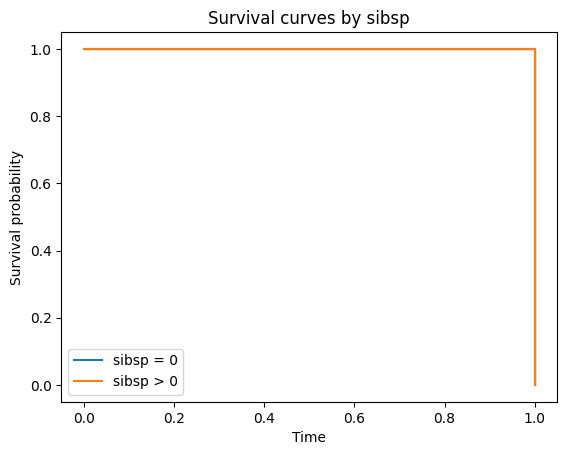

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 1.00     -0.00

In [17]:
# Split the data into two groups based on Sibsp
group_0 = data[data["sibsp"] == 0] # passengers with no siblings or spouses
group_1 = data[data["sibsp"] > 0] # passengers with one or more siblings or spouses

# Create Kaplan-Meier fitters for each group
kmf_0 = KaplanMeierFitter()
kmf_1 = KaplanMeierFitter()

# Fit the data into the fitters
kmf_0.fit(durations = group_0["survived"], event_observed = group_0["survived"], label = "sibsp = 0")
kmf_1.fit(durations = group_1["survived"], event_observed = group_1["survived"], label = "sibsp > 0")

# Plot the survival curves for the two groups
kmf_0.plot()
kmf_1.plot()
plt.title("Survival curves by sibsp")
plt.xlabel("Time")
plt.ylabel("Survival probability")
plt.show()

# Perform the log-rank test to compare the survival curves
results = logrank_test(group_0["survived"], group_1["survived"], event_observed_A = group_0["survived"], event_observed_B = group_1["survived"])
results.print_summary()